# CSE 6367 Programming Assignment 2 (P2)

## Spring 2023

## Due: 11:59pm Central Time, Wednesday, April 5, 2023

### Task 1 (50 points) 

Implement Hough transform from scratch to detect circles in the image. Refer to this wiki page for pseudocode(https://en.wikipedia.org/wiki/Circle_Hough_Transform). Superimpose detected circles on the original image.

Note: You shouldn't use cv2.HoughCircles() to detect the circles.

![circles-2.jpeg](attachment:circles-2.jpeg)

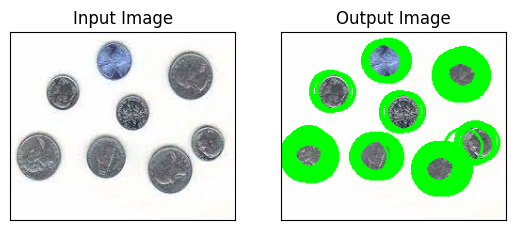

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path = '/content/Images/circles.jpeg'


def show_result(load_img, op_img):
  # Display the input image and the output image
  plt.subplot(121),plt.imshow(load_img,cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(op_img)
  plt.title('Output Image'), plt.xticks([]), plt.yticks([])
  plt.show()


def hough_transform(img, min_radius, max_radius, threshold):

    # Set the dimensions of the Hough space
    height, width = img.shape
    hough_space = np.zeros((height, width, max_radius - min_radius + 1), dtype=np.uint32)

    # Define the range of radii to search for
    radii_range = range(min_radius, max_radius + 1)

    # Find edge pixels using Canny edge detector
    edges = cv2.Canny(img, 100, 200)

    # Loop over each radius and each edge pixel
    for r in radii_range:
        for x in range(width):
            for y in range(height):
                if edges[y, x] > 0:
                    # Calculate the coordinates of the center of the circle
                    for theta in range(0, 360):
                        a = int(x - r * np.cos(np.deg2rad(theta)))
                        b = int(y - r * np.sin(np.deg2rad(theta)))
                        if a >= 0 and a < width and b >= 0 and b < height:
                            # Increment the Hough space at the corresponding (a, b, r) coordinates
                            hough_space[b, a, r - min_radius] += 1

    # Find the peaks in the Hough space
    peaks = np.argwhere(hough_space >= threshold)

    # Convert peaks to (x, y, r) format
    circles = [(peak[1], peak[0], peak[2] + min_radius) for peak in peaks]

    return circles


def draw_circles(img, circles):

    output_img = img.copy()

    # Draw a circle for each detected circle
    for circle in circles:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(output_img, center, radius, (0, 255, 0), 2)

    return output_img


# Load the input image
img_path = '/content/Images/circles.jpeg'
img = cv2.imread(img_path)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set the parameters for the Hough Transform
min_radius = 20
max_radius = 80
threshold = 100

# Detect circles using Hough Transform
circles = hough_transform(gray_img, min_radius, max_radius, threshold)

# Superimpose detected circles on the original image
output_img = draw_circles(img, circles)


show_result(img, output_img)


### Task 2 (50 points)

Implement Harris corner detector from scratch. The steps are mentioned in Slide 46-47 on your lecture slide "5-Harris-corner-detector.pdf". Mark detected corners on original image. 

Note: You shouldn't use cv2.cornerHarris() to detect the corners.

![checkerboard-2.png](attachment:checkerboard-2.png)

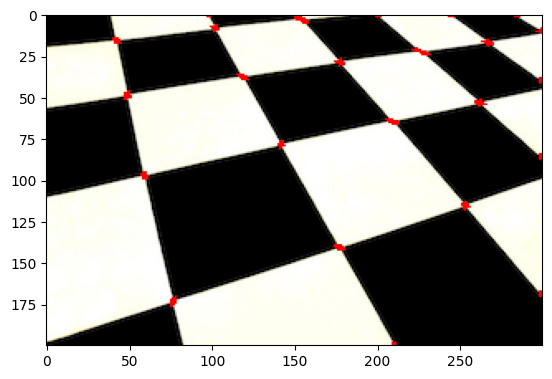

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the input picture.
img_path = '/content/Images/checkerboard.png'
img = cv2.imread(img_path)

# input picture grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the image's x and y components.
dx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
dy = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)

# Calculate derivative products 
Ix2 = dx * dx
Iy2 = dy * dy
Ixy = dx * dy

# Calculate total derivative products at each pixel.
kernel_size = 3
k = 0.04
window = np.ones((kernel_size, kernel_size), np.float32)
filter_x = cv2.filter2D(Ix2, -1, window)
filter_y = cv2.filter2D(Iy2, -1, window)
filter_x_y = cv2.filter2D(Ixy, -1, window)

# compute the Harris reaction function for each px
filter_det = filter_x * filter_y - filter_x_y * filter_x_y
filter_trace = filter_x + filter_y
filter_R = filter_det - k * (filter_trace ** 2)

# set corner threshold
corner_threshold = 0.01 * np.max(filter_R)
my_output_corners = np.argwhere(filter_R > corner_threshold)

# mark the corners.
for corner in my_output_corners:
    x, y = corner
    img[x, y] = [0, 0, 255]

# Show the outcome
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
